Basic code to implement a simple Monte Carlo hit-or-miss sampling in a 2-D space.

In [1]:
import random
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

from scipy import stats

import mc_sim 

## Step 1

Generate random (x,y) points in a certain rectangular area.

In [2]:
def get_rand_number(min_value, max_value):
    
    """
    This function generates a random number from a uniform distribution 
    in a specific input range [min_value, max_value] inclusively
    
    Args:
    - min_value (float)
    - max_value (float)
    
    Return:
    - Random number in this range (float)
    """
    
    input_range = max_value - min_value
    value = random.uniform(0,1)
    
    return min_value + input_range*value

In [3]:
# List of points
points = []
# Num of points
n_points = 10000

for i in range(n_points):
    
    # Generate a x random number between (20, 80)
    x = get_rand_number(20, 80)
    
    # Generate a y random number between (0, 50)
    y = get_rand_number(0, 50)

    points.append((x, y))

# Unpack the list with the zip function
x_data, y_data = zip(*points)

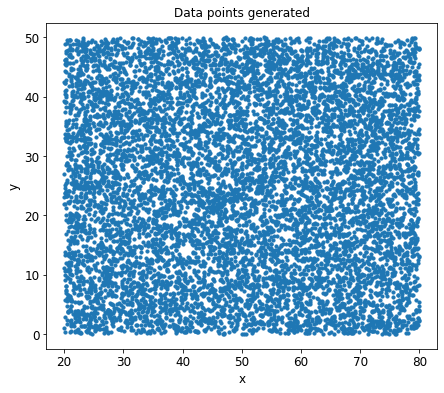

In [4]:
fig = plt.figure(figsize=(7,6))
# plt.plot(*zip(*points),marker='o',markersize=3,linestyle='None')
plt.scatter(*zip(*points),marker='o',s=10,linestyle='None')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Data points generated', fontsize=12)
plt.show()

# Step 2

We choose to evaluate a gaussian function ``f_of_x``, which also has some normalization to fit in the rectangular grid created. 

In [5]:
# Define the function
def f_of_x(x):
    return 1.25e3*stats.norm.pdf(x,50,10)

In [6]:
# Evaluate the function on the data point
fx = f_of_x(x_data)

In [7]:
# Define the function for the plotting (already checked they are the same)
x = np.arange(20,80,1)
fy = f_of_x(x)

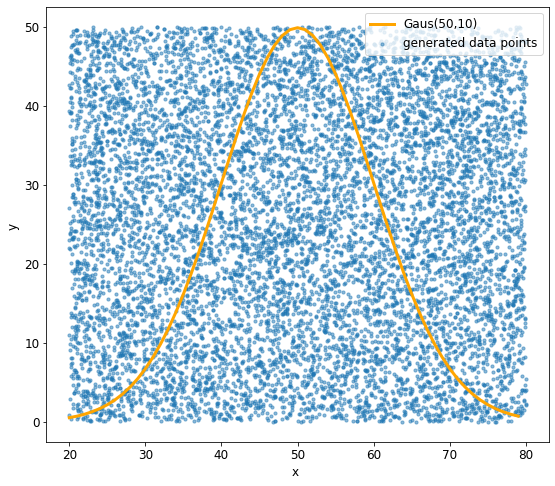

In [8]:
fig = plt.figure(figsize=(9,8))
plt.scatter(*zip(*points),marker='o',s=10,linestyle='None',label='generated data points',alpha=0.5)
# plt.plot(x_data,fx,'o', markersize=1,color='orange',label='Gaus(50,10)')
plt.plot(x,fy, color='orange',linewidth=3,label='Gaus(50,10)')
plt.xlabel('x ',fontsize=12)
plt.ylabel('y ',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Step 3 

Evaluate the accepted/rejected points under/over the Gaussian curve.

In [9]:
def mc_hit_or_miss(x_data, y_data,fx):
    # Define variables
    rejected_points = []
    accepted_points = []
    n_rej = 0
    n_acc = 0

    for i in range(len(points)):

        # Reject the point
        if y_data[i] > fx[i]:
            rejected_points.append((x_data[i], y_data[i]))
    #         print(rejected_points)
            n_rej+=1
        # Accept the point
        elif y_data[i] < fx[i]:
            accepted_points.append((x_data[i], y_data[i]))
            n_acc+=1  
            
    return accepted_points, n_acc, rejected_points, n_rej

In [10]:
accepted_points, n_acc, rejected_points, n_rej = mc_hit_or_miss(x_data, y_data,fx)

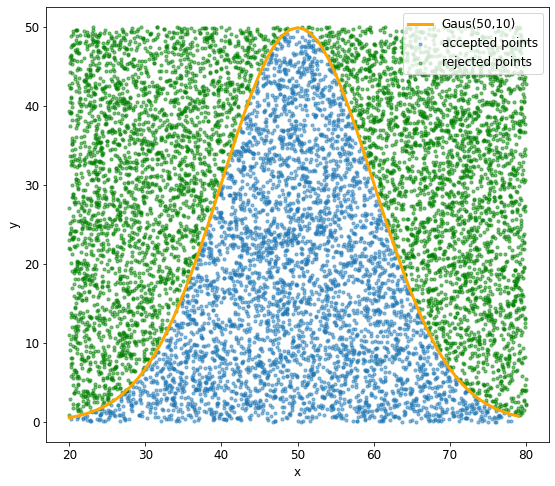

In [11]:
fig = plt.figure(figsize=(9,8))
plt.scatter(*zip(*accepted_points),marker='o',s=10,linestyle='None',label='accepted points',alpha=0.5)
plt.plot(x,fy, color='orange',linewidth=3,label='Gaus(50,10)')
plt.scatter(*zip(*rejected_points),marker='o',s=10,linestyle='None',label='rejected points',alpha=0.5,color='green')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('simple_mc_hit_or_miss.png')
plt.show()

In [12]:
p_xi = n_acc/n_points

In [13]:
print(f'The probability of a rand point to be accepted is {p_xi*100}%.')

The probability of a rand point to be accepted is 41.68%.
